# Цель вычислительного эксперимента:
Цель эксперимента заключается в том, чтобы решить задачу классификации. Задача решается на выборке "Lung Cancer Data Set " с использованием моделей: kNN, SVM, логистическая регрессия. Структурные параметры: число и состав признаков. Используемый критерий качества AUC, F1, число признаков.


# Описание выборки
Используются данные из Lung Cancer Data Set (https://archive.ics.uci.edu/ml/datasets/Lung+Cancer). В выборке представлены медицинские описания онкобольных с 3 видами патологического рака лёгких. Первый столбец это метка предсказываемого класса (3 вида рака: 1-3), остальные 56 столбцов это целочисленные атрибуты, принимающие значения 0-3. Точного описания значения столбцов нет, поэтому будем отталкиваться от предположения, что это в целом описание здоровья больного, его персональные данные итд. 
Число объектов в выборке: 32.
Число признаков: 56 признаков + признак класса.
(32 примера очень малый объем выборки, уччитывыавя в том числе количество признаком по каждому обьекту)

# Блок загрузки и предобработки выборок
* Импортируем библиотеки
* Выгружаем данные по адресу "*/lung-cancer.data.txt"

In [57]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import norm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read data
data = pd.read_csv('lung-cancer.csv', header=None)
classes = data[0]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1,0,3,0,?,0,2,2,2,1,...,2,2,2,2,2,1,1,1,2,2
1,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
2,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
3,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
4,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2


In [34]:
print(data.info(), data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
0     32 non-null int64
1     32 non-null int64
2     32 non-null int64
3     32 non-null int64
4     32 non-null object
5     32 non-null int64
6     32 non-null int64
7     32 non-null int64
8     32 non-null int64
9     32 non-null int64
10    32 non-null int64
11    32 non-null int64
12    32 non-null int64
13    32 non-null int64
14    32 non-null int64
15    32 non-null int64
16    32 non-null int64
17    32 non-null int64
18    32 non-null int64
19    32 non-null int64
20    32 non-null int64
21    32 non-null int64
22    32 non-null int64
23    32 non-null int64
24    32 non-null int64
25    32 non-null int64
26    32 non-null int64
27    32 non-null int64
28    32 non-null int64
29    32 non-null int64
30    32 non-null int64
31    32 non-null int64
32    32 non-null int64
33    32 non-null int64
34    32 non-null int64
35    32 non-null int64
36    32 non-null int64
37    32

In [58]:
Y = data[0]
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [59]:
X = data.drop(0, axis=1)
X.head()

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,0,3,0,?,0,2,2,2,1,1,...,2,2,2,2,2,1,1,1,2,2
1,0,3,3,1,0,3,1,3,1,1,...,2,2,2,2,2,2,2,1,2,2
2,0,3,3,2,0,3,3,3,1,1,...,2,2,2,2,2,2,2,2,1,2
3,0,2,3,2,1,3,3,3,1,2,...,2,2,2,2,2,2,2,2,2,2
4,0,3,2,1,1,3,3,3,2,2,...,2,2,2,2,2,2,2,1,2,2


# Анализ состава выборки
* Анализ состава выборки
* Анализ пропусков, статистика

In [60]:
data.describe()

,0,1,2,3,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,0.281250,2.187500,2.125000,2.406250,1.156250,1.406250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.456803,0.737804,0.751343,0.756024,0.514899,0.559918,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,3.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


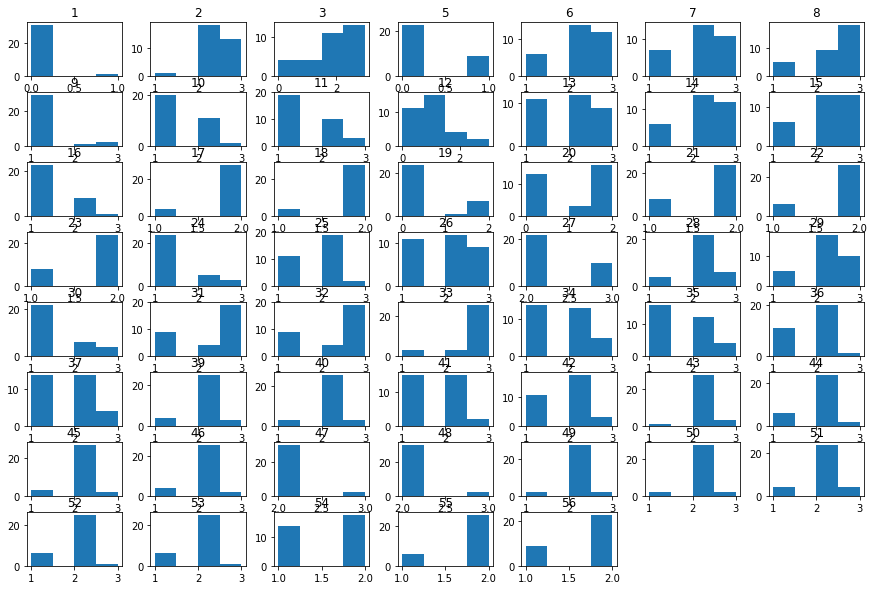

In [61]:
data_mean=data.loc[:,1:56]
#построим гистограмму
hist_mean=data_mean.hist(bins=4, figsize=(15, 10),grid=False,)

Ни в одной из гистрограмм не заметно аномальных выбросов.

In [62]:
for nul_col in data:
    if data[nul_col].dtype != np.int64:
        if (data[nul_col] == '?').any() == True:
            print(nul_col)

4
38


Удалим 4 и 38 из-за наличия пропусков.


In [63]:
data.drop(4,axis=1, inplace=True)
data.drop(38,axis=1, inplace=True)

In [64]:
kind_cancer = data.groupby(0, axis=0)
pd.DataFrame(kind_cancer.size(), columns=['groups'])

,groups
0,
1,9
2,13
3,10


## Анализ мультикорреляции признаков


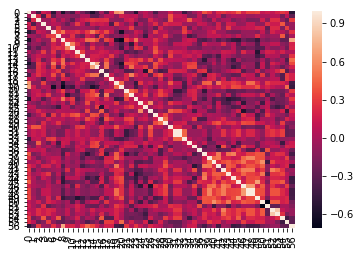

In [65]:
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

Выбросим полностью коррелируемые признаки 31-32 и 47-48, а также сильно коррелируемые 51-52, 52-53.

In [66]:
data.drop(31,axis=1, inplace=True)
data.drop(47,axis=1, inplace=True)
data.drop(52,axis=1, inplace=True)

## Список моделей:
Для решения поставленной задачи используем следующие модели:
* kNN 
* SVM
* Логистическая регрессия

## Список функций ошибки, критериев качества:
В качестве критериев качества используются:
* ROC AUC (не определен для мультиклассовой классификации)
* F1

## Способ разбиения выборки на обучение-контроль:
Будем использовать кросс-валидацию с разбиением на 3 фолда.

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer
neighbor_clf = KNeighborsClassifier()
max_n_neighbors = 20

In [70]:
parameters = {'n_neighbors': np.arange(1, max_n_neighbors, 2)}
clf = GridSearchCV(neighbor_clf, parameters, cv = 5, n_jobs=4, 
                   verbose=1, scoring=make_scorer(f1_score,average='micro'))
clf.fit(data, classes)
knn_score_no_scaling = clf.cv_results_['mean_test_score']
knn_score_std_no_scaling = clf.cv_results_['std_test_score']

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.2s finished


построим график

No handles with labels found to put in legend.


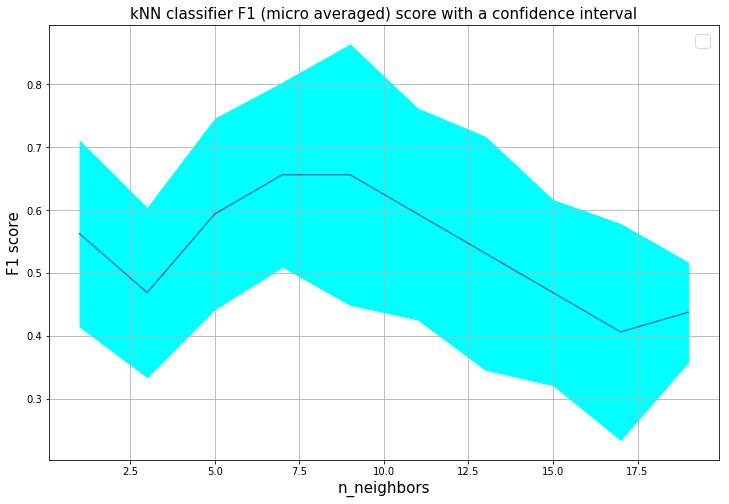

In [74]:
plt.figure(figsize=(12,8))   
x = clf.param_grid['n_neighbors' ]
y = clf.cv_results_['mean_test_score']
plt.plot(x, y)
plt.fill_between(x, y-clf.cv_results_['std_test_score'],
                 y+clf.cv_results_['std_test_score'], 
                 color = 'cyan')
plt.title('kNN classifier' +' F1 (micro averaged) score with a confidence interval', fontsize=15)
plt.xlabel('n_neighbors' , fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.legend(loc='best', prop={'size': 18})
plt.grid()    
plt.show()

Исследуем зависимость от количества признаков. 

No handles with labels found to put in legend.


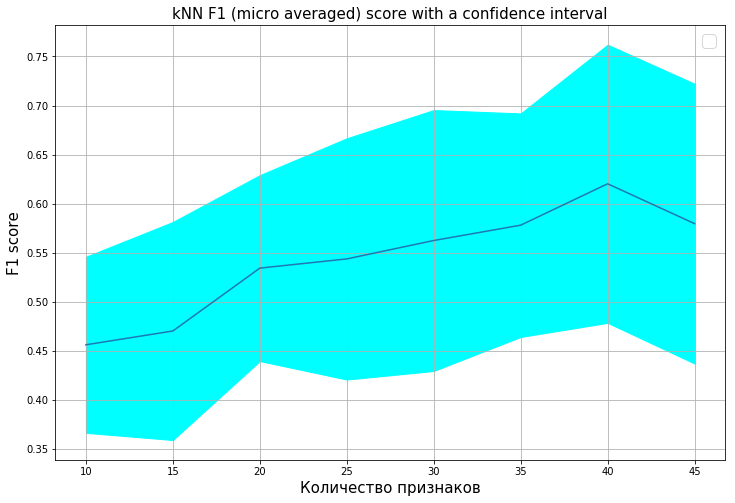

In [80]:
dummy_param = {'n_neighbors':[5]}
score = []
score_std = []
for sub_features in range(10,50,5):
    tmp_score = []
    tmp_score_std = []
    for i in range(20):
        cols = np.random.choice(data.columns, sub_features, replace=False)
        data_small = data[cols]
        classes_small = classes
        clf = GridSearchCV(neighbor_clf, dummy_param, cv = 3, n_jobs=1, 
                   verbose=0, scoring=make_scorer(f1_score,average='micro'))
        clf.fit(data_small, classes_small)
        tmp_score.append(clf.cv_results_['mean_test_score'].mean())
        tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
    score.append(np.mean(tmp_score))
    score_std.append(np.mean(tmp_score_std))
#graph    
plt.figure(figsize=(12,8))
subfeatures = True
x = range(10,50,5) if subfeatures else range(12,36,4)
y = np.array(score)
plt.plot(x, y)
plt.fill_between(x, y-score_std,
                 y+score_std,
                 color = 'cyan')
plt.title('{} F1 (micro averaged) score with a confidence interval'.format("kNN"), fontsize=15)
if subfeatures:
    plt.xlabel('Количество признаков', fontsize=15)
else:
    plt.xlabel('Объем выборки', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.legend(loc='best', prop={'size': 18})
plt.grid()    
plt.show()

Вывод: 
* KNN сходится за одну итерацию
* Оптимальное число соседей 8-9, в остальных значениях качество падает
* На графике зависимости качества от числа признаков видно, что качество немного растет при увелечении признаков до 40.
* Зависимость от размера выборки нет смысла смотреть, посколько он и так слишком мал (32)

# SVM

No handles with labels found to put in legend.


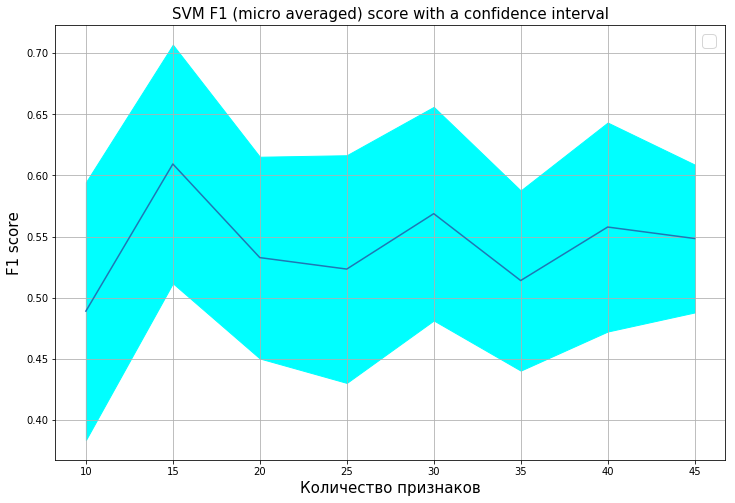

In [96]:
from sklearn.svm import LinearSVC
SVM_clf = LinearSVC()
dummy_param = {'penalty':['l2']}
score = []
score_std = []
for sub_features in range(10,50,5):
    tmp_score = []
    tmp_score_std = []
    for i in range(20):
        cols = np.random.choice(data.columns, sub_features, replace=False)
        data_small = data[cols]
        classes_small = classes
        clf = GridSearchCV(SVM_clf, dummy_param, cv = 3, n_jobs=1, 
                   verbose=0, scoring=make_scorer(f1_score,average='micro'))
        clf.fit(data_small, classes_small)
        tmp_score.append(clf.cv_results_['mean_test_score'].mean())
        tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
    score.append(np.mean(tmp_score))
    score_std.append(np.mean(tmp_score_std))
#graph 
plt.figure(figsize=(12,8))
subfeatures = True
x = range(10,50,5) if subfeatures else range(12,36,4)
y = np.array(score)
plt.plot(x, y)
plt.fill_between(x, y-score_std,
                 y+score_std,
                 color = 'cyan')
plt.title('{} F1 (micro averaged) score with a confidence interval'.format("SVM"), fontsize=15)
if subfeatures:
    plt.xlabel('Количество признаков', fontsize=15)
else:
    plt.xlabel('Объем выборки', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.legend(loc='best', prop={'size': 18})
plt.grid()    
plt.show()

No handles with labels found to put in legend.


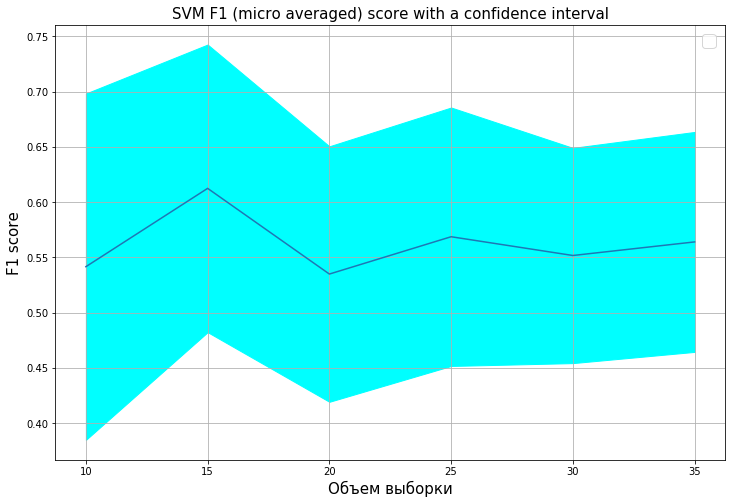

In [116]:
score = []
score_std = []
for s in range(12,36,4):
    # Для каждого размера фитим 20 раз
    tmp_score = []
    tmp_score_std = []
    for i in range(20):
        data_small = data.sample(s)
        classes_small = classes[data_small.index]
        clf = GridSearchCV(SVM_clf, dummy_param, cv = 3, n_jobs=1, 
                   verbose=0, scoring=make_scorer(f1_score,average='micro'))
        clf.fit(data_small, classes_small)
        tmp_score.append(clf.cv_results_['mean_test_score'].mean())
        tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
    score.append(np.mean(tmp_score))
    score_std.append(np.mean(tmp_score_std))
#graph 
plt.figure(figsize=(12,8))
subfeatures = True
x = range(10,40,5) if subfeatures else range(12,36,4)
y = np.array(score)
plt.plot(x, y)
plt.fill_between(x, y-score_std,
                 y+score_std,
                 color = 'cyan')
plt.title('{} F1 (micro averaged) score with a confidence interval'.format("SVM"), fontsize=15)
plt.xlabel('Объем выборки', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.legend(loc='best', prop={'size': 18})
plt.grid()    
plt.show()

Вывод
* SVM сходится за одну итерацию
* Из графика зависимости от обьема выборки качество незначительно растет при увеличении выборки
* Из графика зависимости от количества признаков видим, что качество зависит синусоидально, но перепад не большой

## Logistic Regression

No handles with labels found to put in legend.


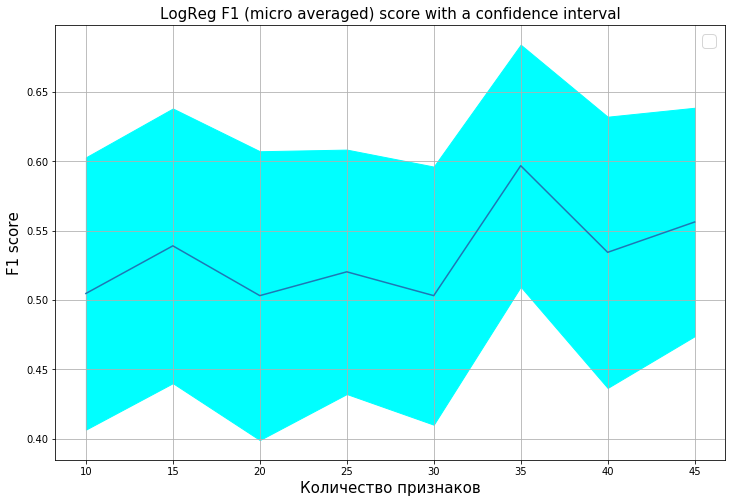

In [120]:
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, LogisticRegression
linear_clf = LogisticRegression()
dummy_param = {'penalty':['l2']}
score = []
score_std = []
for sub_features in range(10,50,5):
    tmp_score = []
    tmp_score_std = []
    # Для каждого размера фитим 20 раз c 5ю соседями и усредняем
    for i in range(20):
        cols = np.random.choice(data.columns, sub_features, replace=False)
        data_small = data[cols]
        classes_small = classes
        clf = GridSearchCV(linear_clf, dummy_param, cv = 3, n_jobs=1, 
                   verbose=0, scoring=make_scorer(f1_score,average='micro'))
        clf.fit(data_small, classes_small)
        tmp_score.append(clf.cv_results_['mean_test_score'].mean())
        tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
    score.append(np.mean(tmp_score))
    score_std.append(np.mean(tmp_score_std))
#graph
plt.figure(figsize=(12,8))
x = range(10,50,5) if subfeatures else range(12,36,4)
y = np.array(score)
plt.plot(x, y)
plt.fill_between(x, y-score_std, \
                 y+score_std, \
                 color = 'cyan')
plt.title('{} F1 (micro averaged) score with a confidence interval'.format("LogReg"), fontsize=15)
if subfeatures:
    plt.xlabel('Количество признаков', fontsize=15)
else:
    plt.xlabel('Объем выборки', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.legend(loc='best', prop={'size': 18})
plt.grid()    
plt.show()

No handles with labels found to put in legend.


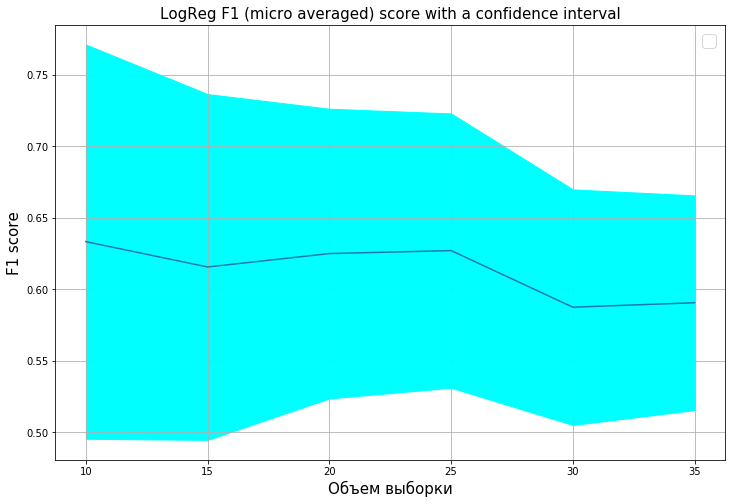

In [123]:
linear_clf = LogisticRegression()
dummy_param = {'penalty':['l2']}
 
score = []
score_std = []
for s in range(12,36,4):
    # Для каждого размера фитим 20 раз
    tmp_score = []
    tmp_score_std = []
    for i in range(20):
        data_small = data.sample(s)
        classes_small = classes[data_small.index]
        clf = GridSearchCV(linear_clf, dummy_param, cv = 3, n_jobs=1, 
                   verbose=0, scoring=make_scorer(f1_score,average='micro'))
        clf.fit(data_small, classes_small)
        tmp_score.append(clf.cv_results_['mean_test_score'].mean())
        tmp_score_std.append(clf.cv_results_['std_test_score'].mean())
    score.append(np.mean(tmp_score))
    score_std.append(np.mean(tmp_score_std))

plt.figure(figsize=(12,8))
x = range(10,40,5) if subfeatures else range(12,36,4)
y = np.array(score)
plt.plot(x, y)
plt.fill_between(x, y-score_std, \
                 y+score_std, \
                 color = 'cyan')
plt.title('{} F1 (micro averaged) score with a confidence interval'.format("LogReg"), fontsize=15)
plt.xlabel('Объем выборки', fontsize=15)
plt.ylabel('F1 score', fontsize=15)
plt.legend(loc='best', prop={'size': 18})
plt.grid()    
plt.show()


Вывод:
* сходится за одну итерацию
* качество незначительно растет с увеличением количества признаков
* качество незначительно растет при увеличении размера выборки, как и от количества признаков

# МАЛЫЙ ОБЪЕМ ВЫБОРКИ!!!!!